In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('./../datasets/hight.csv')

df

,Hight,Weight,Shoe size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M
...,...,...,...,...
104,166,140.0,41,F
105,190,105.0,42,F
106,186,118.0,43,M
107,168,123.0,42,M


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hight      109 non-null    int64  
 1   Weight     109 non-null    float64
 2   Shoe size  109 non-null    int64  
 3   Gender     109 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [66]:
df.describe()

,Hight,Weight,Shoe size
count,109.000000,109.000000,109.000000
mean,173.403670,95.887156,40.743119
std,13.581114,30.423234,1.771187
min,140.000000,49.000000,36.000000
25%,164.000000,68.000000,39.000000
50%,174.000000,95.000000,41.000000
75%,185.000000,118.000000,42.000000
max,197.000000,159.000000,44.000000


In [67]:
df.replace({'Gender': {'M': 1, 'F': 0}}, inplace=True)

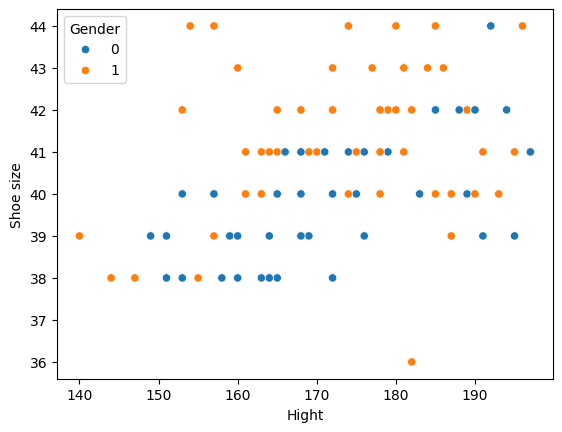

In [68]:
sns.scatterplot(df, x='Hight', y='Shoe size', hue='Gender')
plt.show()

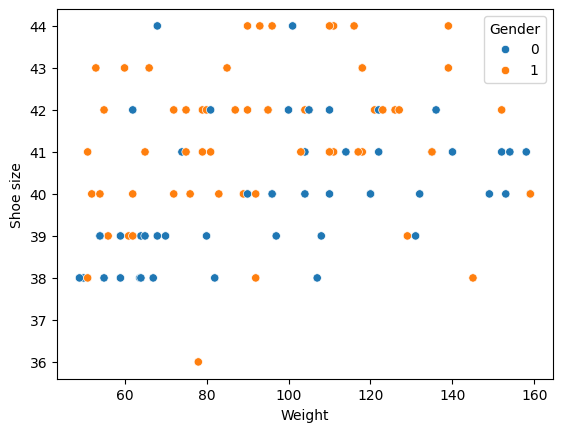

In [69]:
sns.scatterplot(df, x='Weight', y='Shoe size', hue='Gender')
plt.show()

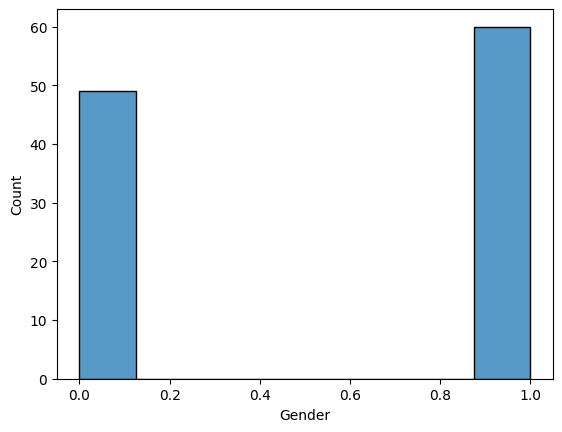

In [70]:
sns.histplot(df, x='Gender')
plt.show()

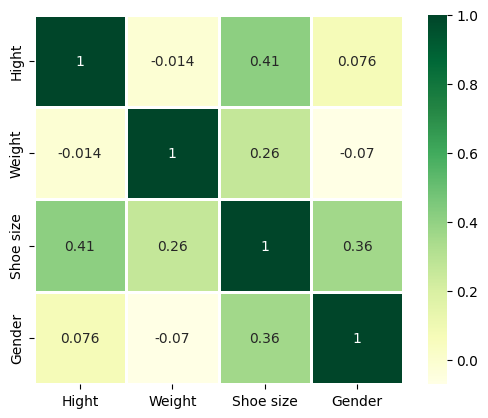

In [71]:
corr = df.corr()

sns.heatmap(corr, cmap='YlGn', square=True, linewidths=1, annot=True)

plt.show()

In [72]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [73]:
lr_model.fit(df[['Hight']], df['Shoe size'])

LinearRegression()

In [74]:
print(f"Theta-1: {lr_model.coef_}")
print(f"Theta-0: {lr_model.intercept_}")

Theta-1: [0.05403062]
Theta-0: 31.37401223042722


In [75]:
def theta(X, Y):
    return np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)

In [76]:
theta1 = theta(df['Hight'], df['Shoe size'])
theta2 = theta(df['Weight'], df['Shoe size'])
theta3 = theta(df['Gender'], df['Shoe size'])

print('Theta-1', theta1)
print('Theta-2', theta2)
print('Theta-3', theta3)

Theta-1 0.054030615675542744
Theta-2 0.015193191969213458
Theta-3 1.2758503401360544


In [77]:
theta0 = df['Shoe size'].mean() - (theta1 * df['Hight'].mean() + theta2 * df['Weight'].mean() + theta3 * df['Gender'].mean())

theta0

29.214877322970416

In [78]:
lr_model = LinearRegression()

In [79]:
lr_model.fit(df[['Hight', 'Weight', 'Gender']], df['Shoe size'])

LinearRegression()

In [80]:
print('Theta-0: ', lr_model.intercept_)
print('Thetas: ', lr_model.coef_)

Theta-0:  29.578702540397344
Thetas:  [0.05107269 0.01693894 1.24259561]


In [81]:
X_test = df[['Hight', 'Weight', 'Gender']].sample(10)
y_test = df['Shoe size'].loc[X_test.index]

X_test

,Hight,Weight,Gender
82,187,89.0,1
53,163,159.0,0
59,153,121.0,1
56,187,62.0,1
1,165,65.0,1
6,165,59.0,0
19,181,118.0,1
18,174,68.0,0
17,164,63.7,0
66,171,152.0,0


In [82]:
def predict(X):
    thetas = np.array([theta1, theta2, theta3])

    return theta0 + np.dot(X, thetas)


In [91]:
hand_by_labels = predict(df[['Hight', 'Weight', 'Gender']].to_numpy())

hand_by_labels

array([41.41650065, 40.39333673, 41.20208708, 39.94086535, 41.50936869,
       38.58734016, 39.02632724, 41.18186062, 41.43511162, 41.58362576,
       41.52959515, 41.34556796, 39.77430482, 39.95311195, 38.61943543,
       41.89935842, 39.74050066, 39.04370462, 39.6493415 , 42.06306575,
       40.61961912, 38.76633408, 39.32515781, 40.62123461, 41.34718344,
       41.35060122, 42.02432173, 40.88179234, 41.33093934, 39.46807411,
       42.28260599, 39.83100183, 40.49788679, 41.25944207, 41.18680049,
       42.25734627, 39.02120057, 41.12326792, 39.64032588, 42.01083742,
       39.10723306, 39.3689351 , 40.01493562, 40.47414916, 41.89584724,
       40.64478544, 39.74534712, 39.81979099, 42.59824525, 39.52608708,
       38.34586458, 42.19989788, 41.5364307 , 40.4375852 , 38.34586458,
       42.19989788, 41.5364307 , 41.71343554, 42.47157305, 40.59578809,
       40.89822324, 40.73840486, 39.85008398, 40.02224236, 41.43216503,
       41.5909325 , 40.76347778, 40.44118977, 40.4934181 , 38.90

In [93]:
labels = lr_model.predict(df[['Hight', 'Weight', 'Gender']])

labels

array([41.35255915, 40.3493236 , 41.13184119, 39.89069287, 41.4377656 ,
       38.57982975, 39.00509436, 41.08179201, 41.33664372, 41.53888747,
       41.48781478, 41.3009747 , 39.7198562 , 40.03836962, 38.59728045,
       41.84506776, 39.71883268, 39.03363468, 39.61719905, 42.06425045,
       40.53744307, 38.73355959, 39.31076289, 40.60340768, 41.36693931,
       41.33408494, 41.9477249 , 40.8904341 , 41.29952741, 39.46440475,
       42.23568686, 39.88736646, 40.56671515, 41.23245131, 41.19729405,
       42.15252743, 39.05437591, 41.09549251, 39.60145153, 41.91435878,
       39.20529109, 39.46039868, 40.15659834, 40.63191213, 41.96031392,
       40.70299429, 39.91672652, 39.85306481, 42.62425894, 39.49811473,
       38.37477135, 42.1343091 , 41.42210605, 40.59684284, 38.37477135,
       42.1343091 , 41.42210605, 41.83943845, 42.53802898, 40.68503184,
       40.79306242, 40.6389088 , 39.96933448, 40.18877305, 41.46738153,
       41.57106218, 40.88685182, 40.39920488, 40.54909656, 39.01

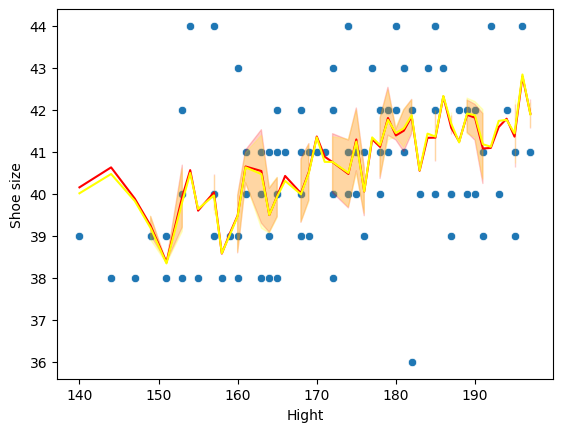

In [100]:
sns.scatterplot(x=df['Hight'], y=df['Shoe size'])
sns.lineplot(x=df['Hight'], y=labels, color='red')
sns.lineplot(x=df['Hight'], y=hand_by_labels, color='yellow')

plt.show()